<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/Pizza_Steak_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import sys
if os.path.exists("/content/pizza_steak.zip"):
  sys.exit("The zip is in the file, please move to the next cell")
else:  
  !wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-10-16 10:53:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  48.6MB/s    in 2.1s    

2021-10-16 10:53:32 (48.6 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
# Unzip
if os.path.exists("/content/pizza_steak"):
  sys.exit("The unzip has been already executed, please move to the next cell")
else:  
  zip_ref = zipfile.ZipFile("pizza_steak.zip")
  zip_ref.extractall()
  zip_ref.close()

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
print(len(os.listdir('/content/pizza_steak/train/pizza')))
print(len(os.listdir('/content/pizza_steak/train/steak')))
print(len(os.listdir('/content/pizza_steak/test/pizza')))
print(len(os.listdir('/content/pizza_steak/test/pizza')))

750
750
250
250


In [6]:
from matplotlib import image

def loadImages(path):
  loaded_images = list()
  for filename in os.listdir(path):
    img_data = image.imread(path + '/' + filename)
    loaded_images.append(img_data)
  return loaded_images 

In [7]:
pizza_list = loadImages('pizza_steak/train/pizza')
steak_list = loadImages('pizza_steak/train/steak')

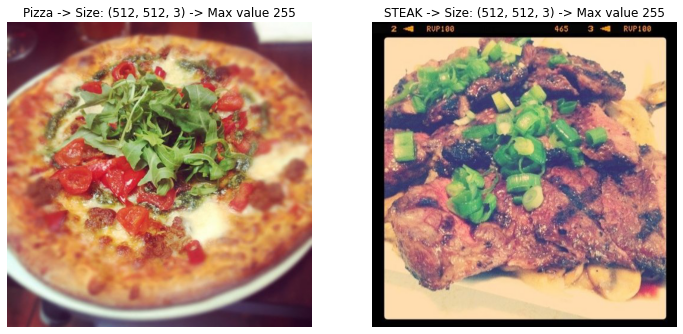

In [8]:
import numpy as np
import matplotlib.pyplot as plt

rand_id = np.random.randint(len(pizza_list))
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(pizza_list[rand_id])
plt.title("Pizza -> Size: {} -> Max value {}".format(pizza_list[rand_id].shape, pizza_list[rand_id].max()))
plt.axis(False)


plt.subplot(1,2,2)
plt.imshow(steak_list[rand_id])
plt.title("STEAK -> Size: {} -> Max value {}".format(steak_list[rand_id].shape, steak_list[rand_id].max()))
plt.axis(False)

plt.show()

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Scaling the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Turn data into batches
train_path = '/content/pizza_steak/train'
test_path = '/content/pizza_steak/test'
train_generator = train_datagen.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=32, class_mode='binary', seed=42)
test_generator = test_datagen.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=32, class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Building a CNN model
model_01 = tf.keras.Sequential([
         tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
         tf.keras.layers.Conv2D(10, 3, activation='relu'),
         tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
         tf.keras.layers.Conv2D(10, 3, activation='relu'),
         tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
         tf.keras.layers.MaxPool2D(pool_size=2),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(1, activation='sigmoid')                       
])

In [14]:
# Compile our model
model_01.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.Accuracy(),
    optimizer = tf.keras.optimizers.Adam()
)

In [15]:
# Fit the model
history_01 = model_01.fit(train_generator, 
                          epochs=5, 
                          steps_per_epoch=len(train_generator), 
                          validation_data=test_generator, 
                          validation_steps=len(test_generator))

Epoch 1/5
47/47 [==============================] - 43s 253ms/step - loss: 0.5898 - accuracy: 0.0000e+00 - val_loss: 0.4049 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4382 - accuracy: 0.0000e+00 - val_loss: 0.3509 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4068 - accuracy: 0.0000e+00 - val_loss: 0.3653 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3711 - accuracy: 0.0000e+00 - val_loss: 0.3274 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3156 - accuracy: 0.0000e+00 - val_loss: 0.3413 - val_accuracy: 0.0000e+00


In [18]:
# Compile our model
model_01.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
    optimizer = tf.keras.optimizers.Adam()
)

In [19]:
# Fit the model
history_01 = model_01.fit(train_generator, 
                          epochs=5, 
                          steps_per_epoch=len(train_generator), 
                          validation_data=test_generator, 
                          validation_steps=len(test_generator))

Epoch 1/5
47/47 [==============================] - 12s 246ms/step - loss: 0.2132 - binary_accuracy: 0.9167 - val_loss: 0.5117 - val_binary_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.1690 - binary_accuracy: 0.9407 - val_loss: 0.4368 - val_binary_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 11s 242ms/step - loss: 0.1036 - binary_accuracy: 0.9680 - val_loss: 0.4727 - val_binary_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.0902 - binary_accuracy: 0.9713 - val_loss: 0.6257 - val_binary_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0495 - binary_accuracy: 0.9880 - val_loss: 0.7161 - val_binary_accuracy: 0.7760
